In [123]:
#import libaries for the study
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
import resreg
import smogn
from sklearn.model_selection import StratifiedKFold, cross_val_predict, KFold
import shap

# 1. Data

In [18]:
# reading the dataframe and viewing
data = pd.read_csv('C:\\Users\\jyu\\Downloads\\insurance.csv')
# Getting info about the dataframe
data.info(), data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(None,
    age     sex     bmi  children smoker     region      charges
 0   19  female  27.900         0    yes  southwest  16884.92400
 1   18    male  33.770         1     no  southeast   1725.55230
 2   28    male  33.000         3     no  southeast   4449.46200
 3   33    male  22.705         0     no  northwest  21984.47061
 4   32    male  28.880         0     no  northwest   3866.85520)

In [17]:
#Exploring the Discrete Statistics of the Data Set
data.describe(include = 'all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


## 1.1 Check missing value

In [26]:
#check missing value
data.isnull().sum()
#results show no missing values 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## 1.2 distribution chart of each feature

<function matplotlib.pyplot.show(close=None, block=None)>

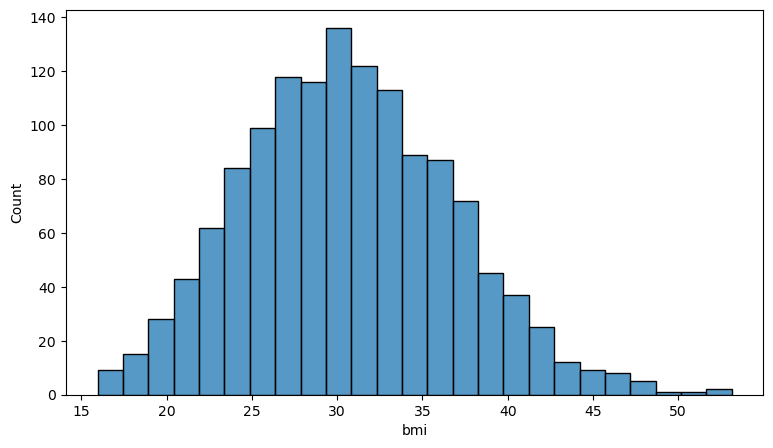

In [40]:
plt.figure(figsize = (9,5))
sns.histplot(data.bmi)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

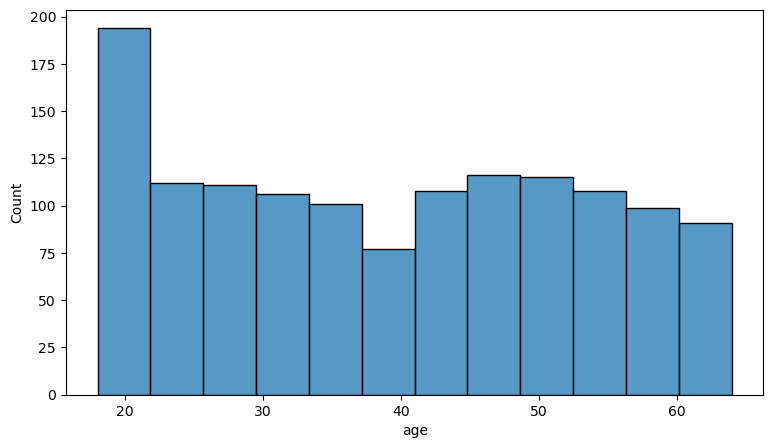

In [41]:
plt.figure(figsize = (9,5))
sns.histplot(data.age)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

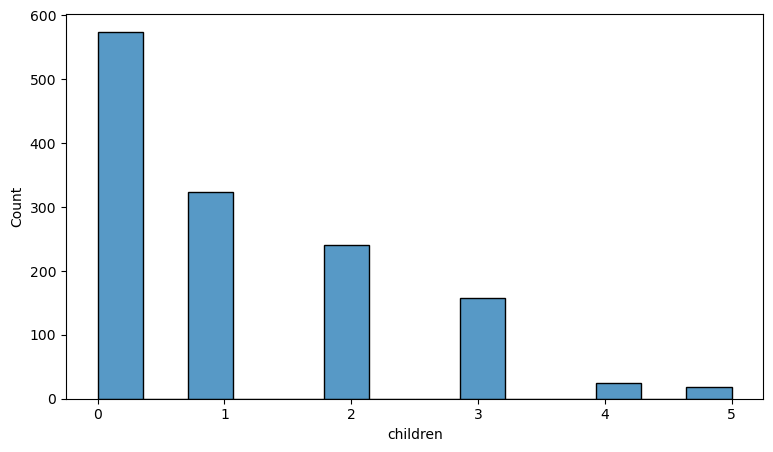

In [42]:
plt.figure(figsize = (9,5))
sns.histplot(data.children)
plt.show

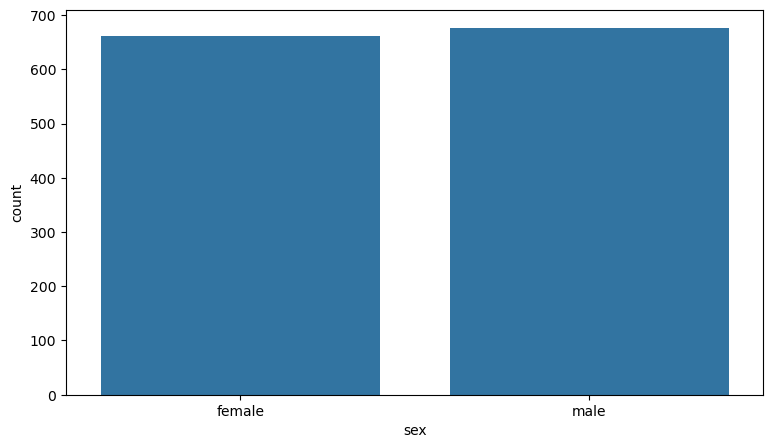

In [43]:
plt.figure(figsize=(9,5))
sns.countplot(x = data.sex)
plt.show()

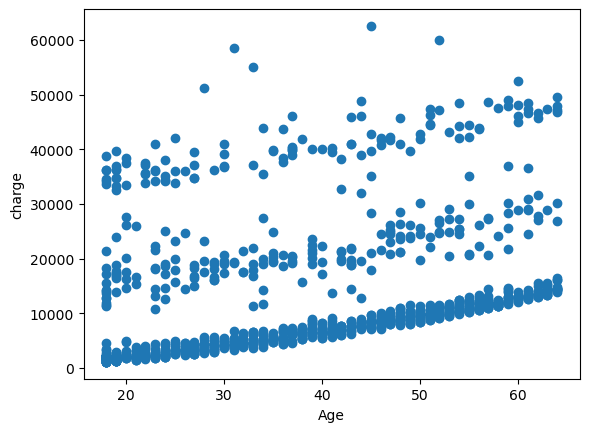

In [11]:
# plot the first feature 
plt.scatter(X_train['age'], y_train)
plt.xlabel('Age')
plt.ylabel('charge')
plt.show()

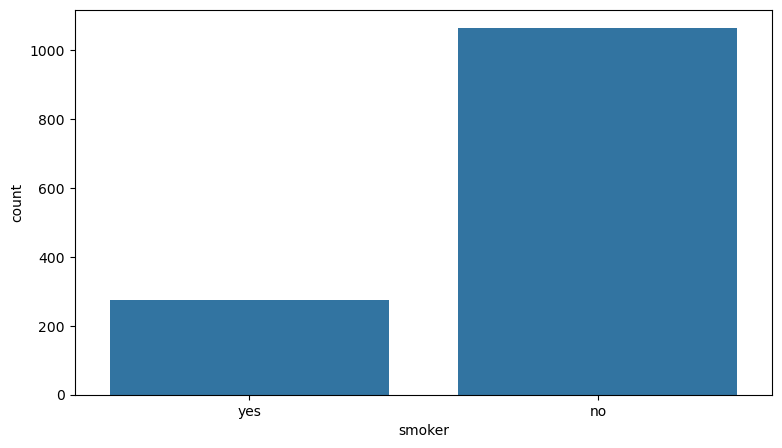

In [44]:
plt.figure(figsize=(9,5))
sns.countplot(x = data.smoker)
plt.show()

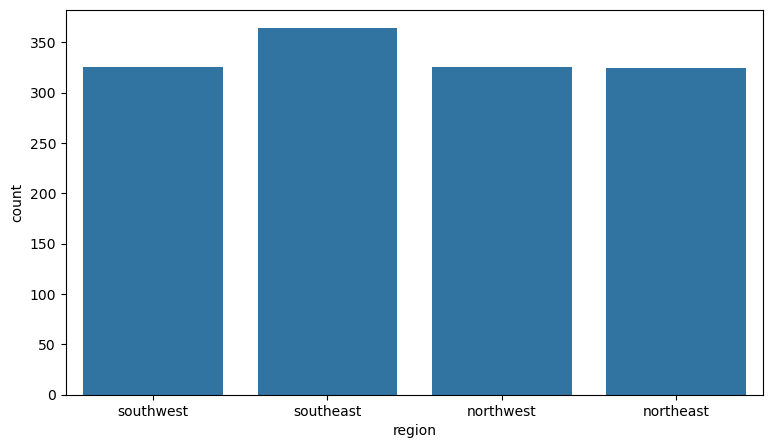

In [45]:
plt.figure(figsize=(9,5))
sns.countplot(x = data.region)
plt.show()

## 1.3 distribution of target variable

<function matplotlib.pyplot.show(close=None, block=None)>

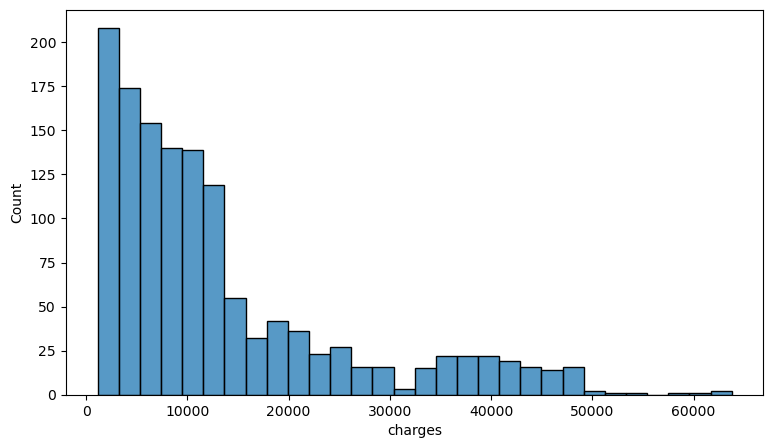

In [47]:
plt.figure(figsize = (9,5))
sns.histplot(data.charges)
plt.show

## 1.4 encoding categorical variables

In [78]:
data_new = data
le = LabelEncoder()
data_new['sex'] = le.fit_transform(data_new['sex'])
data_new['smoker'] = le.fit_transform(data_new['smoker'])
data_new['region'] = le.fit_transform(data_new['region'])
data_new.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## 1.5 check correlation of features

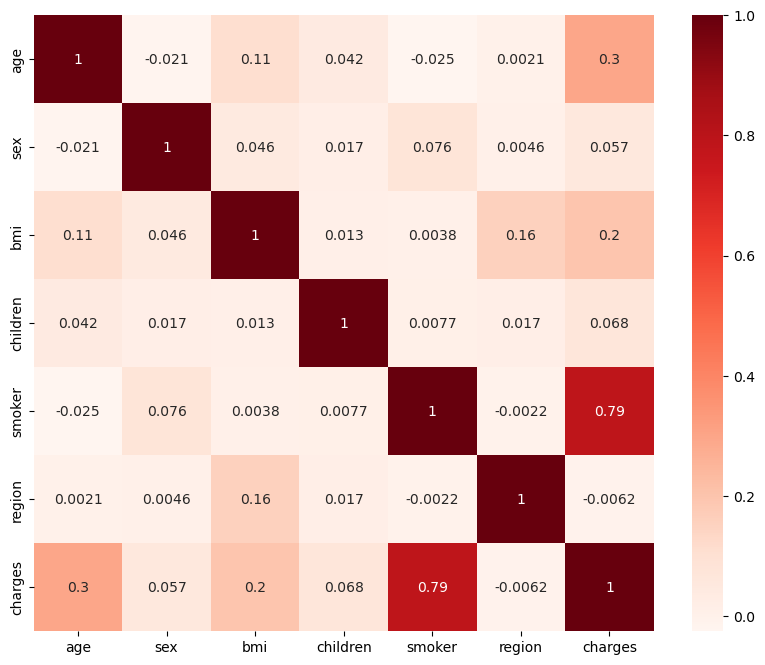

In [80]:
plt.figure(figsize=(10,8))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
#smoker status is highly correlated to target variable

## 1.6 use over sample to handle the imbalance class issue

synth_matrix: 100%|#################################################################| 148/148 [00:01<00:00, 117.25it/s]


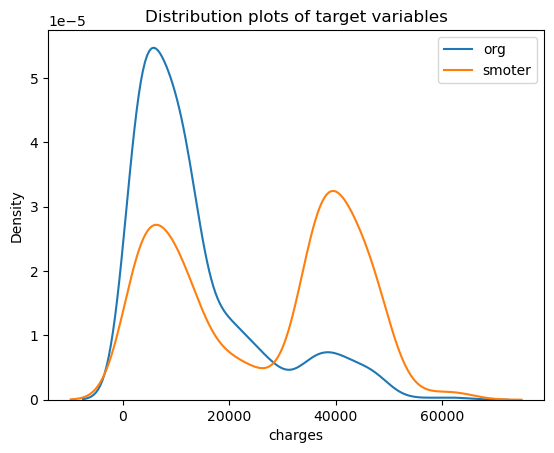

In [83]:
## conduct smogn
del(data_smogn)
data_smogn = smogn.smoter(
    
    ## main arguments
    data = data_new,           ## pandas dataframe
    y = 'charges',          ## string ('header name')
    k = 9,                    ## positive integer (k < n)
    samp_method = 'extreme',  ## string ('balance' or 'extreme')

    ## phi relevance arguments
    rel_thres = 0.80,         ## positive real number (0 < R < 1)
    rel_method = 'auto',      ## string ('auto' or 'manual')
    rel_xtrm_type = 'high',   ## string ('low' or 'both' or 'high')
    rel_coef = 2.25           ## positive real number (0 < R)
)

sns.kdeplot(data=data_new.charges,label="org")
sns.kdeplot(data=data_smogn.charges,label='smoter')
plt.title('Distribution plots of target variables')
plt.legend()
plt.show()

# 2 Modelling

# 2.1 prepare modelling data set

In [86]:
#training data with original data set
X = data_new.drop('charges', axis=1)
y = data_new['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

#training data with over sampling data set
X_smogn = data_smogn.drop('charges', axis=1)
y_smogn = data_smogn['charges']
X_train_smogn, X_test_smogn, y_train_smogn, y_test_smogn = train_test_split(X_smogn, y_smogn, test_size = 0.2, random_state = 42, shuffle = True)


# 2.2 Building multiple ML models and their comparison using hyperparameter tuning (Grid search or random search) using cross-validation

In [180]:
# grid search linear regression
parameters = {'fit_intercept': [True, False], 'positive': [True, False]}

reg = LinearRegression()
reg.fit(X_train, y_train)
grid_reg = GridSearchCV(estimator = reg, param_grid = parameters, scoring= 'r2', cv = 2, verbose = 1, return_train_score=True)      

# fit the model
grid_reg.fit(X_train, y_train)       
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_reg.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_reg.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_reg.best_params_)


Fitting 2 folds for each of 4 candidates, totalling 8 fits
 Results from Grid Search 

 The best estimator across ALL searched params:
 LinearRegression()

 The best score across ALL searched params:
 0.7363065483745692

 The best parameters across ALL searched params:
 {'fit_intercept': True, 'positive': False}


In [182]:
#Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression(**grid_reg.best_params_)
reg.fit(X_train, y_train)
y_pred_test = reg.predict(X_test)
y_test = y_test.reset_index(drop = True)

#Validating Model
# Calculating mean squared error (MSE)
mse_reg_test = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error (MSE): {mse_reg_test}')

# Calculating root mean squared error (RMSE)
rmse_reg_test = np.sqrt(mse_reg_test)
print('Root Mean Squared Error:', rmse_reg_test)

# Calculating R-squared
r2_reg_test = round(r2_score(y_test, y_pred_test),2)
print(f'R-squared: {r2_reg_test*100}')

Mean Squared Error (MSE): 33635210.43117842
Root Mean Squared Error: 5799.587091438357
R-squared: 78.0


In [183]:
#Linear Regression with over sampling data to solve the imbalanced class issue. Switch to over sampling data
from sklearn.linear_model import LinearRegression
reg = LinearRegression(**grid_reg.best_params_)
reg.fit(X_train_smogn, y_train_smogn)
y_pred_test = reg.predict(X_test_smogn)
y_test = y_test.reset_index(drop = True)

#Validating Model
# Calculating mean squared error (MSE)
mse_reg_test = mean_squared_error(y_test_smogn, y_pred_test)
print(f'Mean Squared Error (MSE): {mse_reg_test}')

# Calculating root mean squared error (RMSE)
rmse_reg_test = np.sqrt(mse_reg_test)
print('Root Mean Squared Error:', rmse_reg_test)

# Calculating R-squared
r2_reg_test = round(r2_score(y_test_smogn, y_pred_test),2)
print(f'R-squared: {r2_reg_test*100}')

Mean Squared Error (MSE): 52714198.30722734
Root Mean Squared Error: 7260.454414651148
R-squared: 82.0


In [185]:
#Grid search for RFR
RFR = RandomForestRegressor()
parameters = {'max_depth':[3,5,10],
              'n_estimators':[10,100],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }
grid_RFR = GridSearchCV(estimator=RFR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_RFR.fit(X_train_smogn, y_train_smogn)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_RFR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_RFR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_RFR.best_params_)

C:\Users\jyu\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
144 fits failed out of a total of 432.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
144 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jyu\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jyu\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\jyu\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(max_depth=10, max_features=3, min_samples_leaf=3)

 The best score across ALL searched params:
 0.8866533944427386

 The best parameters across ALL searched params:
 {'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}


In [184]:
#Random Forest Regressor with grid search best parameters
from sklearn.ensemble import RandomForestRegressor

#RFR = RandomForestRegressor()
RFR =RandomForestRegressor(**grid_RFR.best_params_)

RFR.fit(X_train_smogn,y_train_smogn)

# Predicting on the test set
y_pred_test = RFR.predict(X_test_smogn)

# Calculating mean squared error (MSE)
mse_rfr_test = mean_squared_error(y_test_smogn, y_pred_test)
print(f'Mean Squared Error (MSE): {mse_rfr_test}')

# Calculating root mean squared error (RMSE)
rmse_rfr_test = np.sqrt(mse_rfr_test)
print('Root Mean Squared Error:', rmse_rfr_test)

# Calculating R-squared
r2_rfr_test = round(r2_score(y_test_smogn, y_pred_test),2)
print(f'R-squared: {r2_rfr_test*100}')

Mean Squared Error (MSE): 33346289.2949113
Root Mean Squared Error: 5774.624602076857
R-squared: 88.0


In [186]:
#Grid search for GBR
GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train_smogn, y_train_smogn)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)



 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.01, max_depth=8, n_estimators=500,
                          subsample=0.1)

 The best score across ALL searched params:
 0.8834362233013648

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.1}


In [121]:
#Gradient Boosting Regressor with grid search best parameters
from sklearn.ensemble import GradientBoostingRegressor
#GBR = GradientBoostingRegressor()
GBR = GradientBoostingRegressor(**grid_GBR.best_params_)

GBR.fit(X_train_smogn, y_train_smogn)
y_pred_test = GBR.predict(X_test_smogn)

#Validating Model
# Calculating mean squared error (MSE)
mse_reg_test = mean_squared_error(y_test_smogn, y_pred_test)
print(f'Mean Squared Error (MSE): {mse_reg_test}')

# Calculating root mean squared error (RMSE)
rmse_reg_test = np.sqrt(mse_reg_test)
print('Root Mean Squared Error:', rmse_reg_test)

# Calculating R-squared
r2_reg_test = round(r2_score(y_test_smogn, y_pred_test),2)
print(f'R-squared: {r2_reg_test*100}')


Mean Squared Error (MSE): 36388756.8479623
Root Mean Squared Error: 6032.309412485594
R-squared: 87.0


In [106]:
# Among 3 models, Gradient Boosting Regressor and Random Forecast Regressor produce much better results than linear regression. 

# 2.4 shap values for each feature

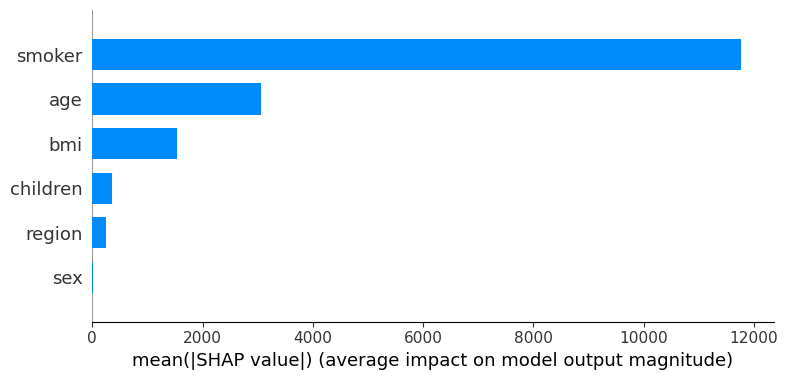

In [137]:

explainer = shap.LinearExplainer(reg, X_train_smogn)
shap_values = explainer.shap_values(X_test_smogn)
shap.summary_plot(shap_values, X_test_smogn, plot_type = 'bar')

# 2.5 explanation of the models

In [142]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(reg.coef_))], axis = 1)
coefficients.loc[len(coefficients)] = ['intercept',reg.intercept_]
coefficients

,0,0
0,age,257.056264
1,sex,-18.791457
2,bmi,335.781491
3,children,425.091456
4,smoker,23647.818096
5,region,-271.284266
6,intercept,-11946.606567


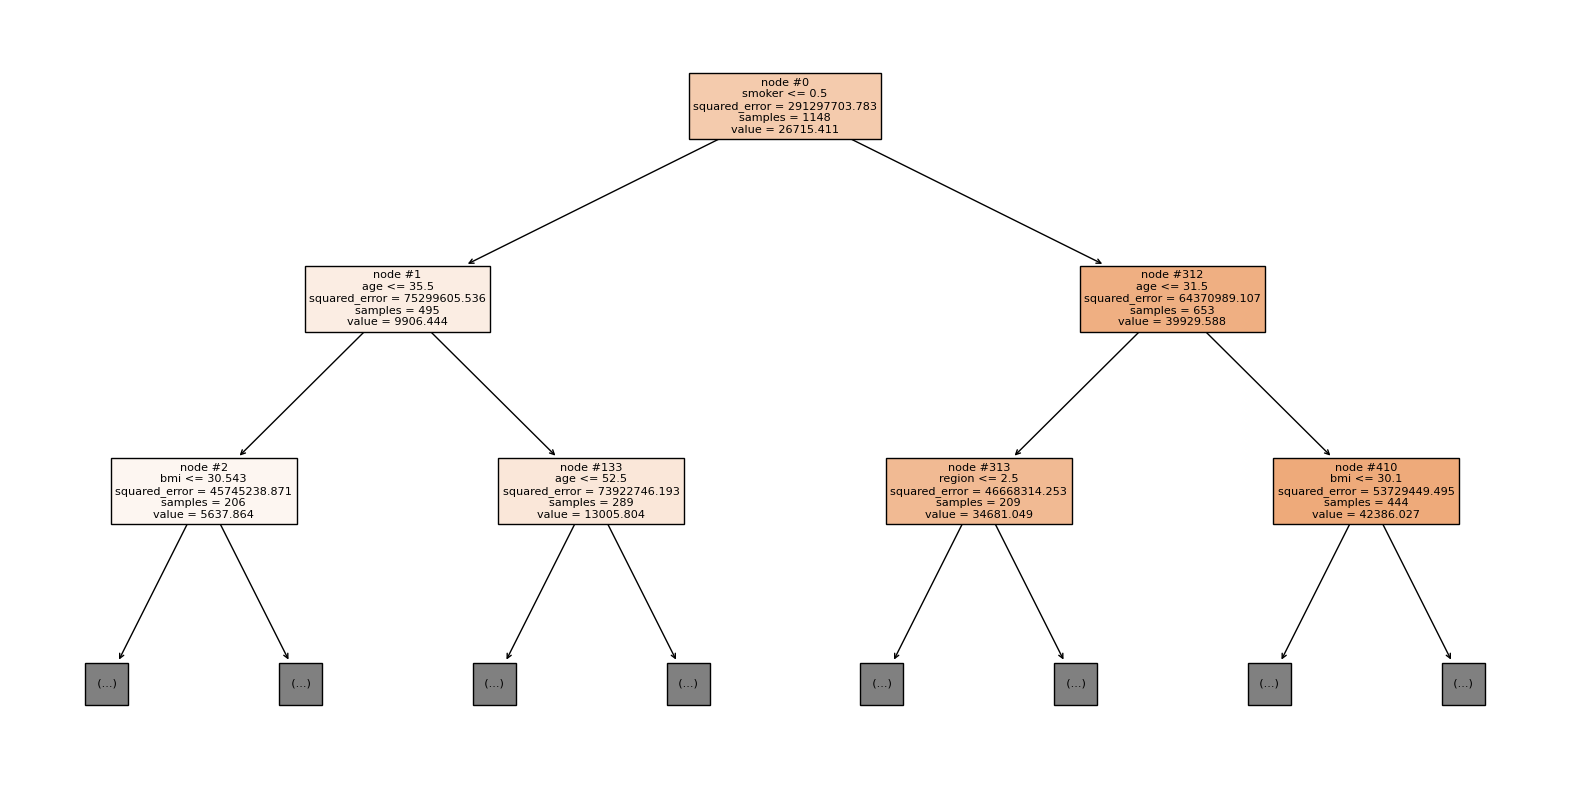

In [171]:

# Extract a single tree from the forest
tree_index = 0  # Index of the tree to extract
single_tree = RFR.estimators_[tree_index]

# Plot the tree
plt.figure(figsize=(20, 10))
tree.plot_tree(single_tree, feature_names=X_train.columns, filled=True,node_ids=True, max_depth=2)
plt.show()

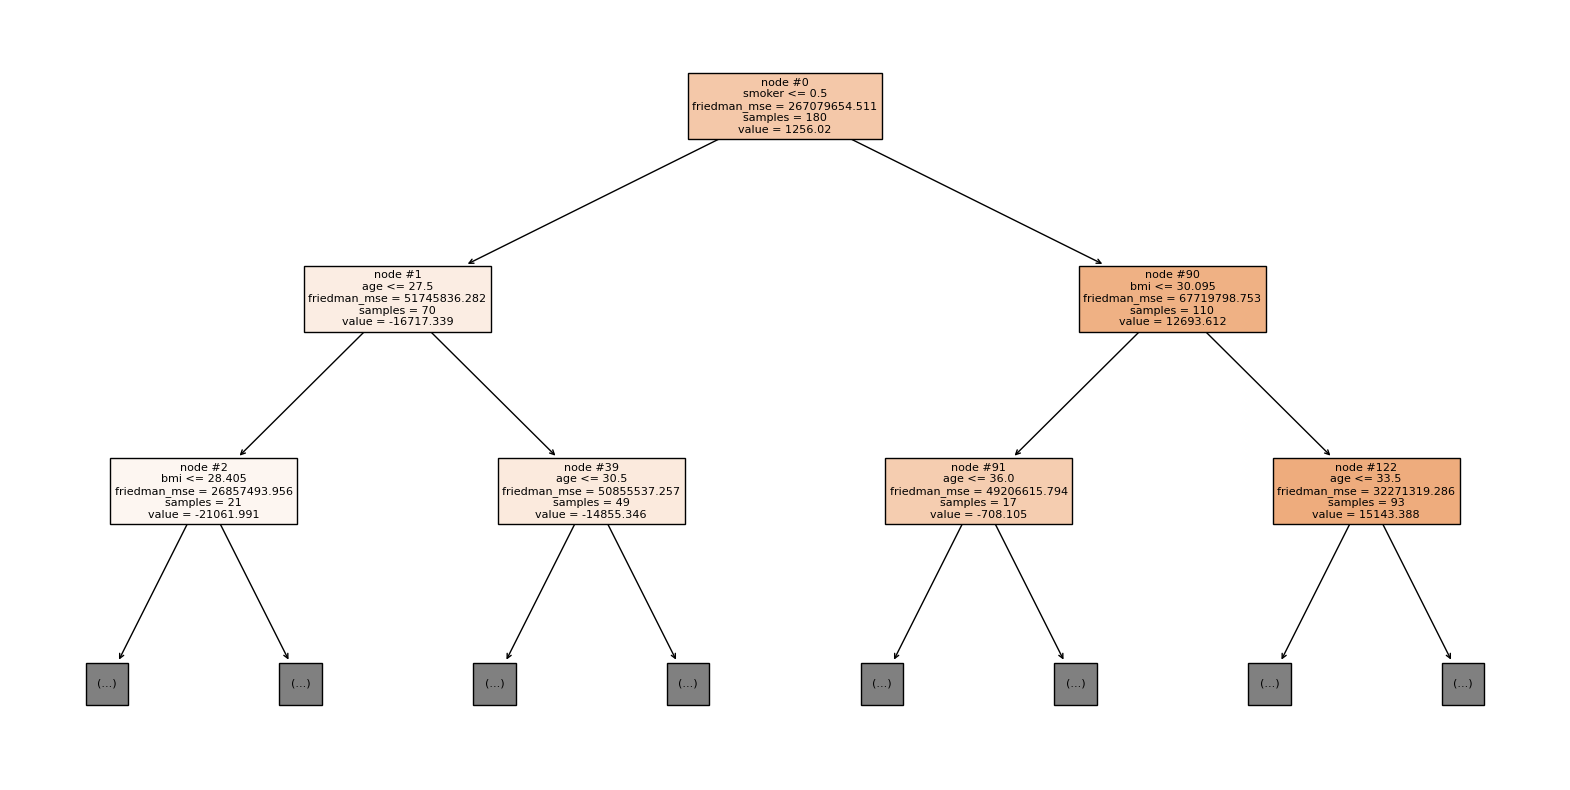

In [170]:
# Extract a single tree from the forest
tree_index = 0  # Index of the tree to extract
single_tree = GBR.estimators_[tree_index][0]

# Plot the tree
plt.figure(figsize=(20, 10))
tree.plot_tree(single_tree, feature_names=X_train.columns, filled=True,node_ids=True, max_depth=2)
plt.show()
